In [8]:
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
img = image.load_img('/content/drive/MyDrive/data2/training/dangerous/B0008_0264.jpg')

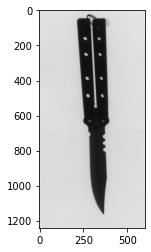

In [42]:
plt.imshow(img)

In [44]:
cv2.imread('/content/drive/MyDrive/data2/training/dangerous/B0008_0264.jpg').shape

(1241, 601, 3)

In [45]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [47]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/data2/training/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/data2/validation/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 449 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [48]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation= 'relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [49]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [53]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 2,
                      epochs = 100,
                      validation_data = validation_dataset)

Epoch 1/100
2/2 [==============================] - 2s 917ms/step - loss: 0.4549 - accuracy: 0.8333 - val_loss: 0.1709 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 2s 814ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.1359 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 2s 861ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.1079 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 1s 834ms/step - loss: 0.0912 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 2s 851ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 2s 904ms/step - loss: 0.5412 - accuracy: 0.8333 - val_loss: 0.1816 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 1s 816ms/step - loss: 0.0869 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 1.0000
Epoch 8/100
2

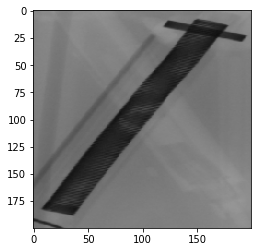

Safe


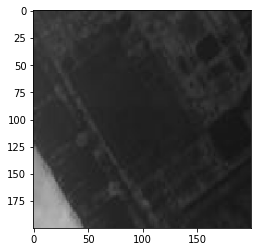

Safe


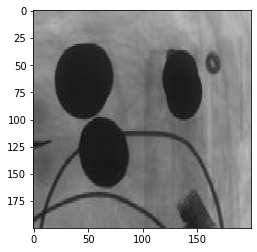

Dangerous


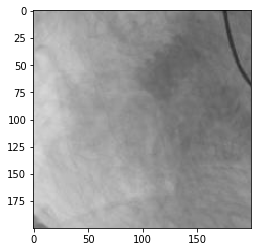

Safe


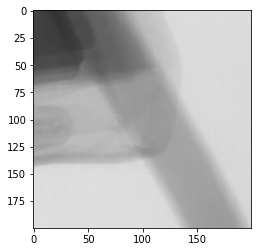

Safe


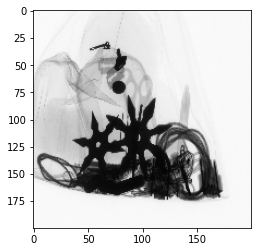

Dangerous


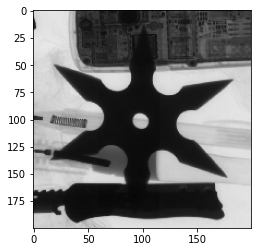

Dangerous


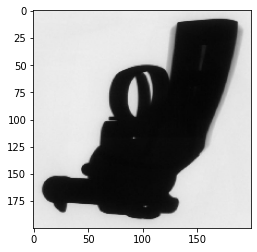

Dangerous


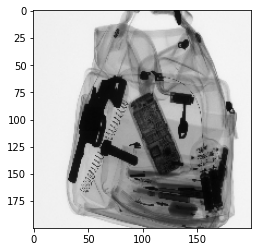

Dangerous


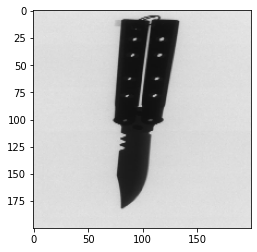

Dangerous


In [54]:
dir_path = '/content/drive/MyDrive/data/showcase/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print('Dangerous')
  else:
    print('Safe')